In [1043]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

importation of required files for use 

In [1044]:
df = pd.read_csv('top_hollywood_grossing_movies.csv')
df.shape

(900, 11)

Reading from the hollywood grossing movies csv and checking the number of rows and columns.

In [1045]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  900 non-null    int64 
 1   Title                       900 non-null    object
 2   Movie Info                  900 non-null    object
 3   Distributor                 900 non-null    object
 4   Release Date                698 non-null    object
 5   Domestic Sales (in $)       900 non-null    int64 
 6   International Sales (in $)  900 non-null    int64 
 7   World Sales (in $)          900 non-null    int64 
 8   Genre                       900 non-null    object
 9   Movie Runtime               900 non-null    object
 10  License                     729 non-null    object
dtypes: int64(4), object(7)
memory usage: 77.5+ KB


checking the information. ie the column titles and the number of data in each column to see if there was any non values

In [1046]:
df.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Title,Star Wars: Episode VII - The Force Awakens (2015),Avengers: Endgame (2019),Avatar (2009),Black Panther (2018),Avengers: Infinity War (2018)
Movie Info,"As a new threat to the galaxy rises, Rey, a de...",After the devastating events of Avengers: Infi...,A paraplegic Marine dispatched to the moon Pan...,"T'Challa, heir to the hidden but advanced king...",The Avengers and their allies must be willing ...
Distributor,Walt Disney Studios Motion Pictures,Walt Disney Studios Motion Pictures,Twentieth Century Fox,Walt Disney Studios Motion Pictures,Walt Disney Studios Motion Pictures
Release Date,"December 16, 2015","April 24, 2019","December 16, 2009",NaN,NaN
Domestic Sales (in $),936662225,858373000,760507625,700426566,678815482
International Sales (in $),1132859475,1939128328,2086738578,647171407,1369544272
World Sales (in $),2069521700,2797501328,2847246203,1347597973,2048359754
Genre,"['Action', 'Adventure', 'Sci-Fi']","['Action', 'Adventure', 'Drama', 'Sci-Fi']","['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","['Action', 'Adventure', 'Sci-Fi']","['Action', 'Adventure', 'Sci-Fi']"
Movie Runtime,2 hr 18 min,3 hr 1 min,2 hr 42 min,2 hr 14 min,2 hr 29 min


Transposing the data and displaying the top 5. Transpose is to change the data orientation where the titles of the coumns are on the left row.

In [1047]:
df_noRelease = df.drop(['Release Date'], axis=1)
df_noRelease.shape

(900, 10)

Dropping the rease date of the movies, as the titles of the movies contgain the year the movies were released.

In [1048]:
df_noRelease['Year'] = df_noRelease['Title'].str.extract(r'\((\d{4})\)')
df_noRelease['Year'] = df_noRelease['Year'].astype(int)
df_noRelease['Title'] = df_noRelease['Title'].str.replace(r'\((\d{4})\)', '')
df_new_year = df_noRelease
df_new_year.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Title,Star Wars: Episode VII - The Force Awakens (2015),Avengers: Endgame (2019),Avatar (2009),Black Panther (2018),Avengers: Infinity War (2018)
Movie Info,"As a new threat to the galaxy rises, Rey, a de...",After the devastating events of Avengers: Infi...,A paraplegic Marine dispatched to the moon Pan...,"T'Challa, heir to the hidden but advanced king...",The Avengers and their allies must be willing ...
Distributor,Walt Disney Studios Motion Pictures,Walt Disney Studios Motion Pictures,Twentieth Century Fox,Walt Disney Studios Motion Pictures,Walt Disney Studios Motion Pictures
Domestic Sales (in $),936662225,858373000,760507625,700426566,678815482
International Sales (in $),1132859475,1939128328,2086738578,647171407,1369544272
World Sales (in $),2069521700,2797501328,2847246203,1347597973,2048359754
Genre,"['Action', 'Adventure', 'Sci-Fi']","['Action', 'Adventure', 'Drama', 'Sci-Fi']","['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","['Action', 'Adventure', 'Sci-Fi']","['Action', 'Adventure', 'Sci-Fi']"
Movie Runtime,2 hr 18 min,3 hr 1 min,2 hr 42 min,2 hr 14 min,2 hr 29 min
License,PG-13,PG-13,PG-13,NaN,NaN


The data after the Release Date was removed and the years of the movies was used to check the years they were released. This was done by creating a new column called year to store the new data.

In [1079]:
df_new_year.describe()

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $),Year
count,900.000000,9.000000e+02,9.000000e+02,9.000000e+02,900.000000
mean,449.500000,1.694776e+08,2.332383e+08,4.017626e+08,2006.635556
std,259.951919,1.043421e+08,2.185393e+08,3.092720e+08,9.715787
min,0.000000,8.190346e+07,2.600000e+02,8.260470e+07,1937.000000
25%,224.750000,1.025566e+08,9.222500e+07,2.033883e+08,2001.000000
50%,449.500000,1.338492e+08,1.670817e+08,3.070346e+08,2008.000000
75%,674.250000,1.942324e+08,2.896735e+08,4.827288e+08,2014.000000
max,899.000000,9.366622e+08,2.086739e+09,2.847246e+09,2021.000000


<Axes: title={'center': 'Number of Movies per Year'}, xlabel='Year', ylabel='Number of Movies'>

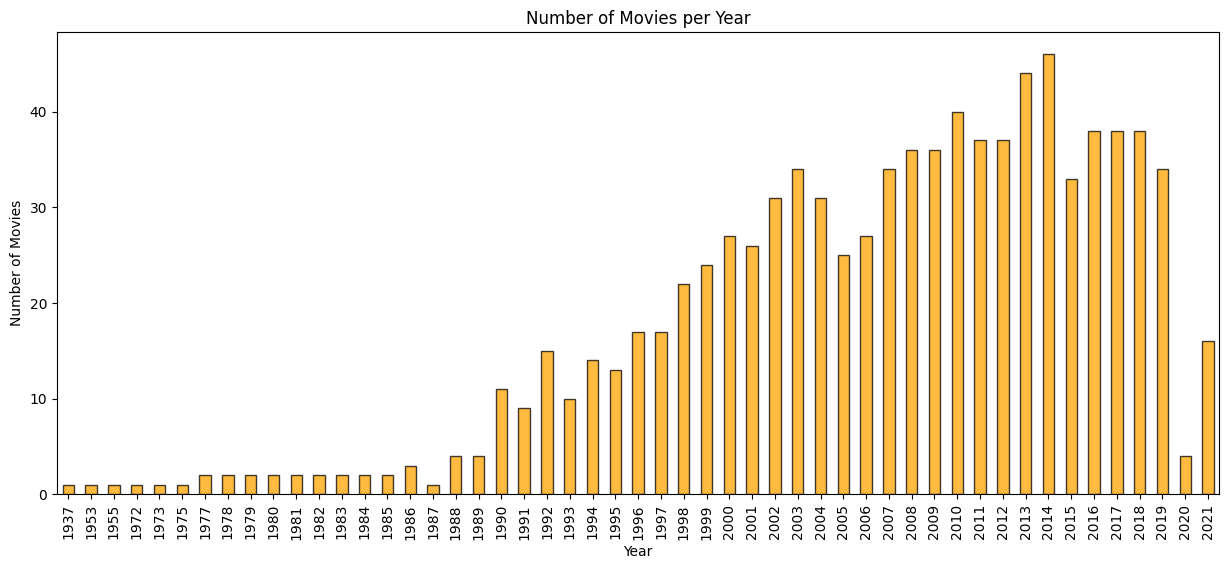

In [1049]:
df_new_year['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6), xlabel='Year', ylabel='Number of Movies', title='Number of Movies per Year', color='orange', edgecolor='black', alpha=0.75)

A graph containing the amount of movies released in a given year from 1937 containing the least amount of movies produced to 2014 containing the most 


In [1050]:
df_new_year['Year'].value_counts().sort_index() 

Year
1937     1
1953     1
1955     1
1972     1
1973     1
1975     1
1977     2
1978     2
1979     2
1980     2
1981     2
1982     2
1983     2
1984     2
1985     2
1986     3
1987     1
1988     4
1989     4
1990    11
1991     9
1992    15
1993    10
1994    14
1995    13
1996    17
1997    17
1998    22
1999    24
2000    27
2001    26
2002    31
2003    34
2004    31
2005    25
2006    27
2007    34
2008    36
2009    36
2010    40
2011    37
2012    37
2013    44
2014    46
2015    33
2016    38
2017    38
2018    38
2019    34
2020     4
2021    16
Name: count, dtype: int64

total amount of movies in each year

In [1051]:
#mean, median and mode
mean = df_new_year['Year'].mean()
median = df_new_year['Year'].median()
mode = df_new_year['Year'].mode()
print('Mean: ', mean, '\nMedian: ', median, '\nMode: ', mode)



Mean:  2006.6355555555556 
Median:  2008.0 
Mode:  0    2014
Name: Year, dtype: int32


deriving the mean, median and mode amount of movies produced each year. The mean year for movie production was 2006, 2008 was the mid point of the dataset and 2014 contained the most movies produced

<Axes: title={'center': 'Number of Movies per Year by Distributor'}, xlabel='Year', ylabel='Number of Movies'>

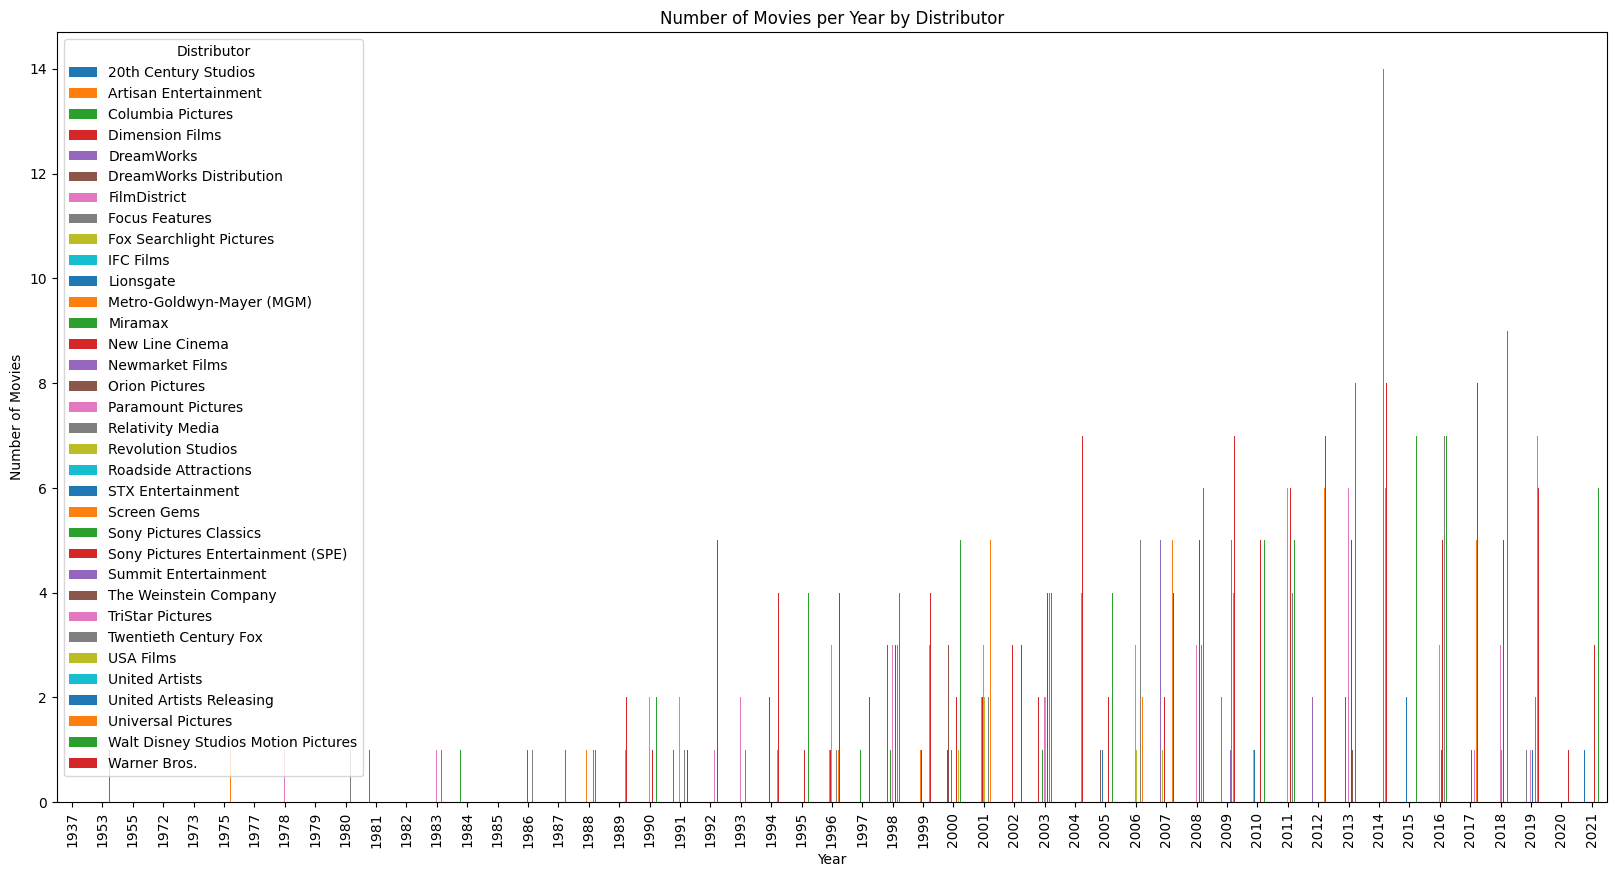

In [1052]:
df_new_year.groupby(['Year', 'Distributor']).size().unstack().plot(kind='bar', stacked=False, figsize=(20, 10), xlabel='Year', ylabel='Number of Movies', title='Number of Movies per Year by Distributor')

The Graph contains the movies produced by the given companies of the data set throughout the years 

In [1053]:
df_new_year['Domestic Sales (in $)'].describe()

count    9.000000e+02
mean     1.694776e+08
std      1.043421e+08
min      8.190346e+07
25%      1.025566e+08
50%      1.338492e+08
75%      1.942324e+08
max      9.366622e+08
Name: Domestic Sales (in $), dtype: float64

The interqartile range of Domestic Sales (in $)


In [1054]:
Q1 = df_new_year['Domestic Sales (in $)'].quantile(0.25)
Q3 = df_new_year['Domestic Sales (in $)'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR

(102556632.5, 194232449.0, 91675816.5)

In [1055]:
lower_domestic = Q1 - 1.5 * IQR
upper_domestic = Q3 + 1.5 * IQR
lower_domestic, upper_domestic

(-34957092.25, 331746173.75)

In [1056]:
outliers = (df_new_year['Domestic Sales (in $)'] < lower_domestic), (df_new_year['Domestic Sales (in $)'] > upper_domestic)
outliers

(0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 895    False
 896    False
 897    False
 898    False
 899    False
 Name: Domestic Sales (in $), Length: 900, dtype: bool,
 0       True
 1       True
 2       True
 3       True
 4       True
        ...  
 895    False
 896    False
 897    False
 898    False
 899    False
 Name: Domestic Sales (in $), Length: 900, dtype: bool)

Outliers found

In [1057]:
df_new_year[outliers[0] | outliers[1]]

,Unnamed: 0,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2018
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...
62,62,Joker (2019),"In Gotham City, mentally troubled comedian Art...",Warner Bros.,335451311,738968073,1074419384,"['Crime', 'Drama', 'Thriller']",2 hr 2 min,R,2019
63,63,Aquaman (2018),"Arthur Curry, the human-born heir to the under...",Warner Bros.,335061807,813424079,1148485886,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 23 min,NaN,2018
64,64,Spider-Man: Homecoming (2017),Peter Parker balances his life as an ordinary ...,Sony Pictures Entertainment (SPE),334201140,545965784,880166924,"['Action', 'Adventure', 'Sci-Fi']",2 hr 13 min,PG-13,2017
65,65,Alice in Wonderland (2010),Nineteen-year-old Alice returns to the magical...,Walt Disney Studios Motion Pictures,334191110,691277106,1025468216,"['Adventure', 'Family', 'Fantasy', 'Mystery']",1 hr 48 min,PG,2010


The outliers of the dataset


In [1058]:
df_new_year['International Sales (in $)'].describe()

count    9.000000e+02
mean     2.332383e+08
std      2.185393e+08
min      2.600000e+02
25%      9.222500e+07
50%      1.670817e+08
75%      2.896735e+08
max      2.086739e+09
Name: International Sales (in $), dtype: float64

The interqartile range of International Sales (in $)


In [1059]:
Q1 = df_new_year['International Sales (in $)'].quantile(0.25)
Q3 = df_new_year['International Sales (in $)'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR

(92225000.0, 289673532.5, 197448532.5)

In [1060]:
lower_International = Q1 - 1.5 * IQR
upper_International = Q3 + 1.5 * IQR
lower_International, upper_International

(-203947798.75, 585846331.25)

In [1061]:
outliers_International = (df_new_year['International Sales (in $)'] < lower_International), (df_new_year['International Sales (in $)'] > upper_International)
outliers_International

(0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 895    False
 896    False
 897    False
 898    False
 899    False
 Name: International Sales (in $), Length: 900, dtype: bool,
 0       True
 1       True
 2       True
 3       True
 4       True
        ...  
 895    False
 896    False
 897    False
 898    False
 899    False
 Name: International Sales (in $), Length: 900, dtype: bool)

The outliers in the international column

In [1062]:
df_new_year[outliers_International[0] | outliers_International[1]]

,Unnamed: 0,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2018
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...
222,222,Ice Age: Dawn of the Dinosaurs (2009),When Sid's attempt to adopt three dinosaur egg...,Twentieth Century Fox,196573705,690113112,886686817,"['Adventure', 'Animation', 'Comedy', 'Family']",1 hr 34 min,PG,2009
290,290,Pirates of the Caribbean: Dead Men Tell No Tal...,Captain Jack Sparrow is pursued by old rival C...,Walt Disney Studios Motion Pictures,172558876,622322566,794881442,"['Action', 'Adventure', 'Fantasy']",2 hr 9 min,PG-13,2017
312,312,2012 (2009),A frustrated writer struggles to keep his fami...,Sony Pictures Entertainment (SPE),166112167,625105659,791217826,"['Action', 'Adventure', 'Sci-Fi']",2 hr 38 min,PG-13,2009
330,330,Ice Age: Continental Drift (2012),"Manny, Diego, and Sid embark upon another adve...",Twentieth Century Fox,161321843,715922939,877244782,"['Adventure', 'Animation', 'Comedy', 'Family']",1 hr 28 min,PG,2012


The dataframe of the outliers in the International section

In [1063]:
df_new_year['World Sales (in $)'].describe()

count    9.000000e+02
mean     4.017626e+08
std      3.092720e+08
min      8.260470e+07
25%      2.033883e+08
50%      3.070346e+08
75%      4.827288e+08
max      2.847246e+09
Name: World Sales (in $), dtype: float64

The interqartile range of Worldwide Sales (in $)


In [1064]:
Q1_world = df_new_year['World Sales (in $)'].quantile(0.25)
Q3_world = df_new_year['World Sales (in $)'].quantile(0.75)
IQR_world = Q3_world - Q1_world
Q1_world, Q3_world, IQR_world

(203388302.25, 482728831.75, 279340529.5)

In [1065]:
lower_word = Q1_world - 1.5 * IQR_world
upper_word = Q3_world + 1.5 * IQR_world
lower_word, upper_word

(-215622492.0, 901739626.0)

In [1066]:
outliers_world = (df_new_year['World Sales (in $)'] < lower_word), (df_new_year['World Sales (in $)'] > upper_word)
outliers_world

(0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 895    False
 896    False
 897    False
 898    False
 899    False
 Name: World Sales (in $), Length: 900, dtype: bool,
 0       True
 1       True
 2       True
 3       True
 4       True
        ...  
 895    False
 896    False
 897    False
 898    False
 899    False
 Name: World Sales (in $), Length: 900, dtype: bool)

In [1067]:
df_new_year[outliers_world[0] | outliers_world[1]]

,Unnamed: 0,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2018
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...
125,125,The Hobbit: The Battle of the Five Armies (2014),Bilbo and company are forced to engage in a wa...,Warner Bros.,255119788,707063077,962182865,"['Adventure', 'Fantasy']",2 hr 24 min,NaN,2014
135,135,Transformers: Age of Extinction (2014),When humanity allies with a bounty hunter in p...,Paramount Pictures,245439076,858614996,1104054072,"['Action', 'Adventure', 'Sci-Fi']",2 hr 45 min,PG-13,2014
142,142,Pirates of the Caribbean: On Stranger Tides (2...,Jack Sparrow and Barbossa embark on a quest to...,Walt Disney Studios Motion Pictures,241071802,804642000,1045713802,"['Action', 'Adventure', 'Fantasy']",2 hr 17 min,PG-13,2011
163,163,The Fate of the Furious (2017),When a mysterious woman seduces Dominic Torett...,Universal Pictures,226008385,1009996733,1236005118,"['Action', 'Crime', 'Thriller']",2 hr 16 min,PG-13,2017


The outliers of the Worldwide sales

<Axes: title={'center': 'Domestic Sales (in $) vs Year'}, xlabel='Year', ylabel='Domestic Sales (in $)'>

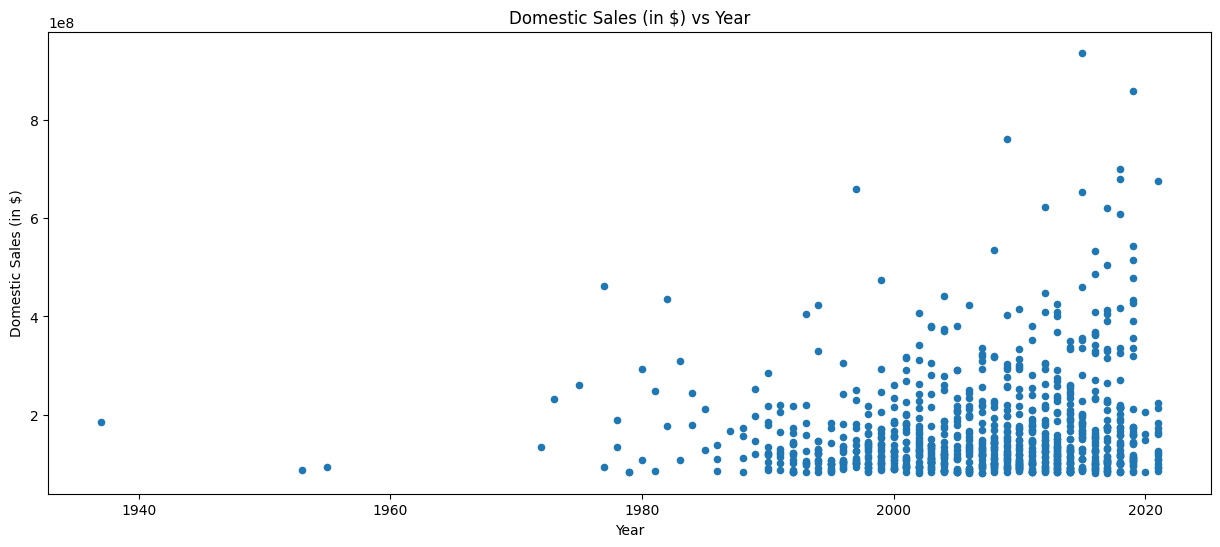

In [1068]:
df_new_year.plot.scatter(x='Year', y='Domestic Sales (in $)', figsize=(15, 6), title='Domestic Sales (in $) vs Year')


A comparison the domestic sales against the year


<Axes: title={'center': 'International Sales (in $) vs Year'}, xlabel='Year', ylabel='International Sales (in $)'>

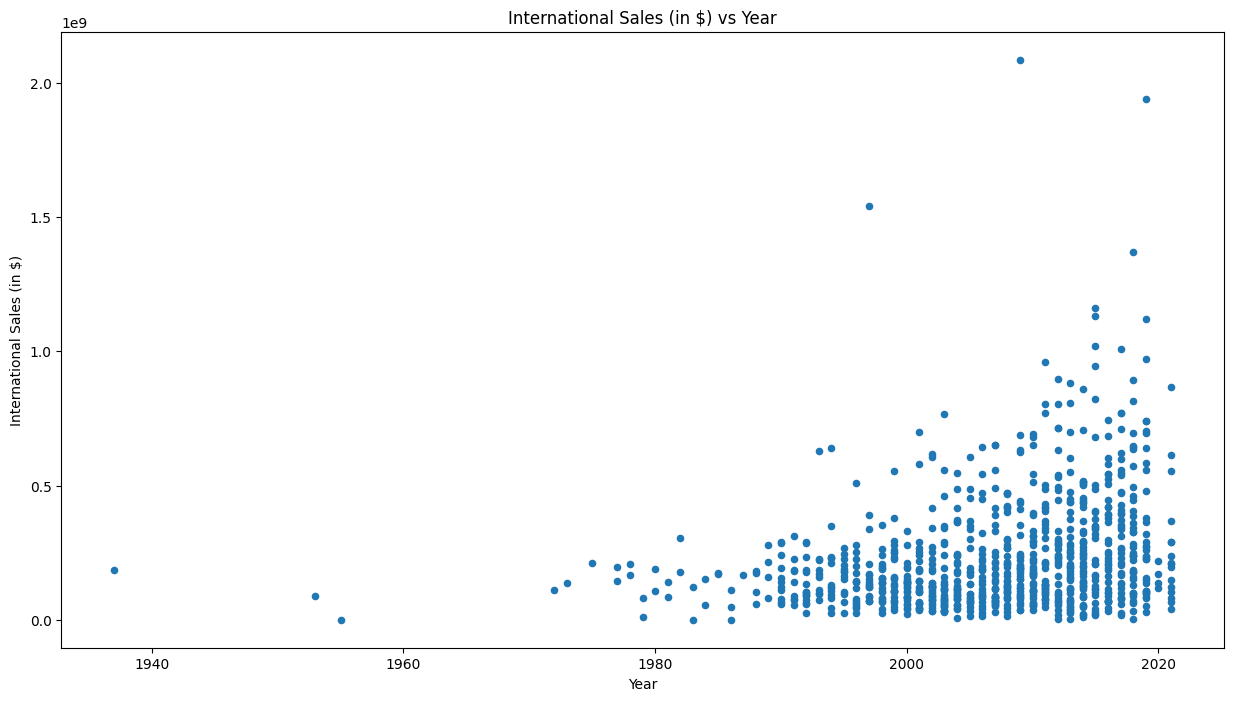

In [1069]:
df_new_year.plot.scatter(x='Year', y='International Sales (in $)', figsize=(15, 8), title='International Sales (in $) vs Year')

A comparison of the international sales against the year


<Axes: title={'center': 'Distributor vs Domestic Sales (in $)'}, xlabel='Distributor'>

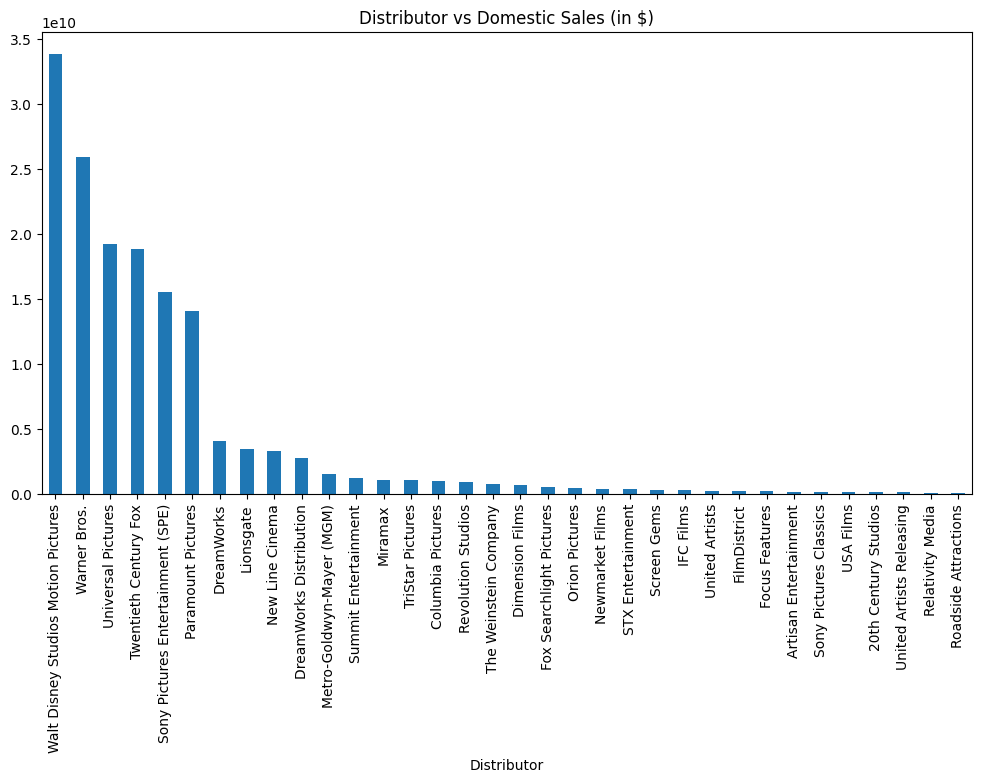

In [1070]:
df_new_year.groupby('Distributor')['Domestic Sales (in $)'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Distributor vs Domestic Sales (in $)')

distributors that dominate the domestic sales


<Axes: title={'center': 'Distributor vs International Sales (in $)'}, xlabel='Distributor'>

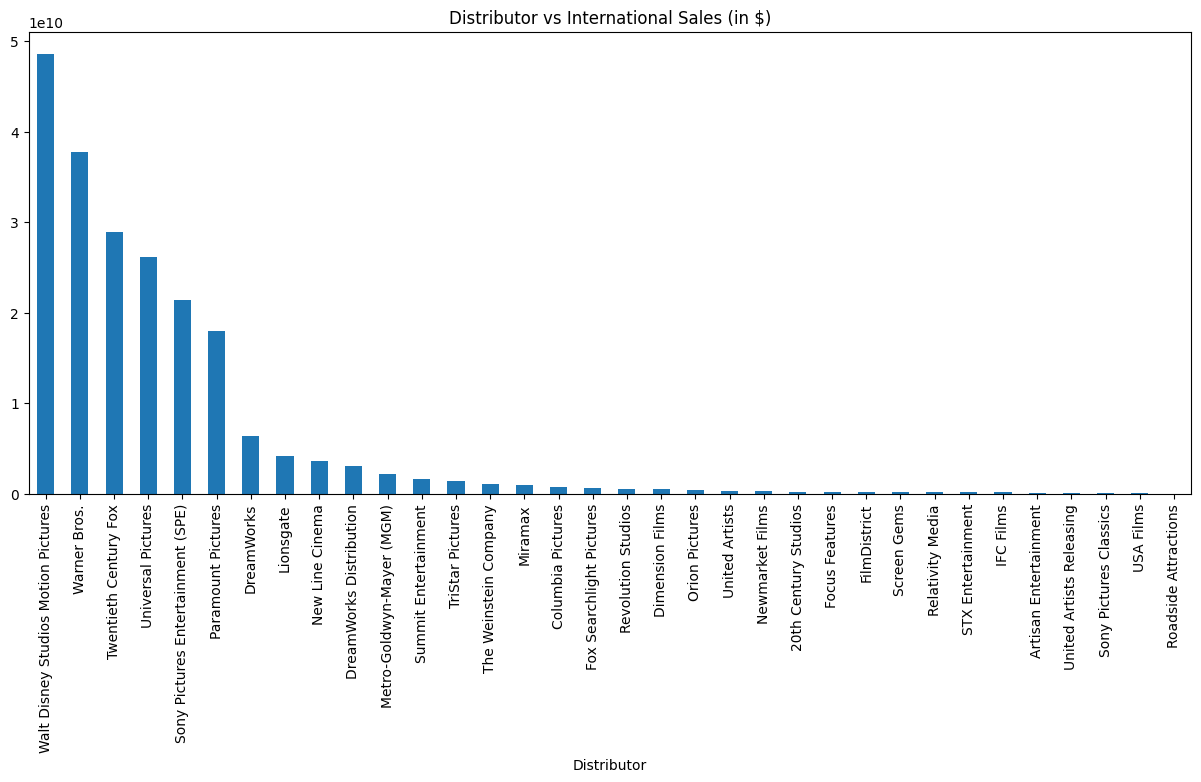

In [1071]:
df_new_year.groupby('Distributor')['International Sales (in $)'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 6), title='Distributor vs International Sales (in $)')

distributors that dominate the international sales


<Axes: title={'center': 'Distributor vs Number of Movies'}, xlabel='Distributor'>

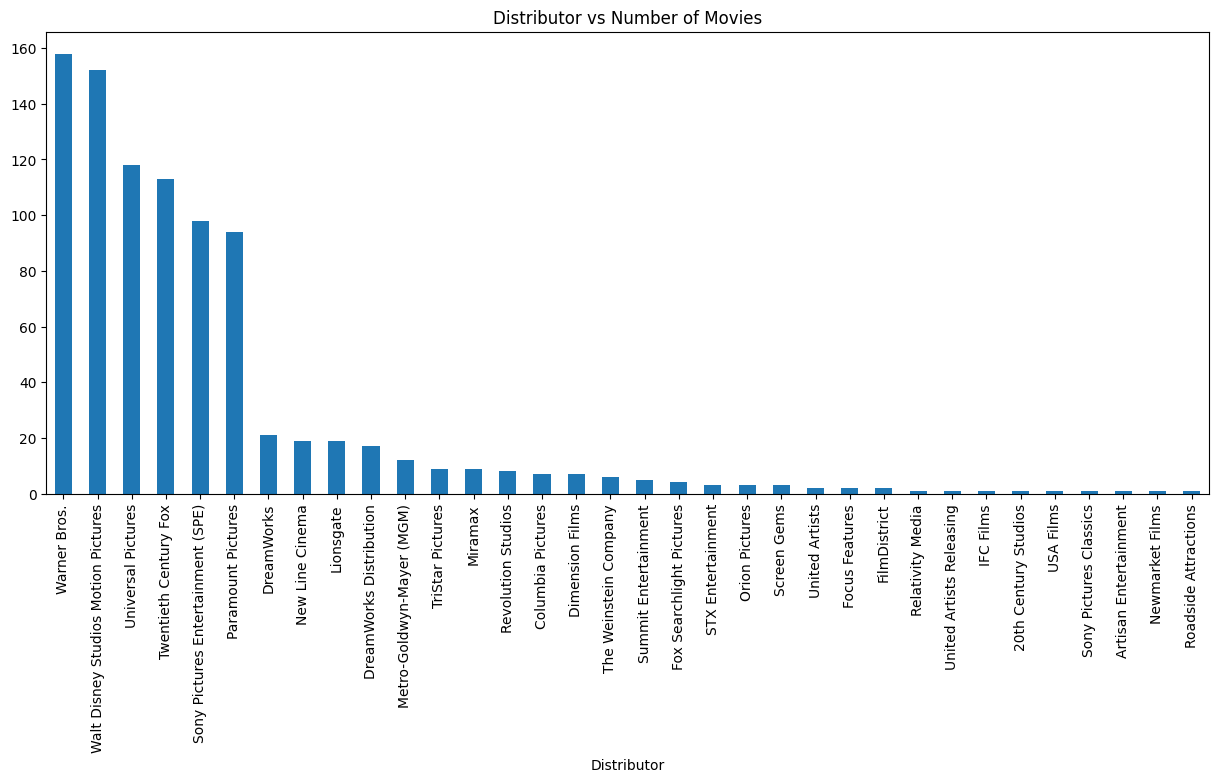

In [1072]:
df_new_year['Distributor'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(15, 6), title='Distributor vs Number of Movies')

distributors that published the most movies


In [1073]:
genre = []
for i in df_new_year['Genre']:
    genre_list = str(i).replace('[]', '').replace('[', '').replace(']', '').replace("'", '').split(', ')
    genre.append(genre_list)

df_new_year['Genre'] = genre

Separating the individual Subgenres in the Genre column

In [1074]:
#separate the genres into unique columns
df_new_genre = df_new_year.join(df_new_year.pop('Genre').str.join('|').str.get_dummies())
df_new_genre.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Title,Star Wars: Episode VII - The Force Awakens (2015),Avengers: Endgame (2019),Avatar (2009),Black Panther (2018),Avengers: Infinity War (2018)
Movie Info,"As a new threat to the galaxy rises, Rey, a de...",After the devastating events of Avengers: Infi...,A paraplegic Marine dispatched to the moon Pan...,"T'Challa, heir to the hidden but advanced king...",The Avengers and their allies must be willing ...
Distributor,Walt Disney Studios Motion Pictures,Walt Disney Studios Motion Pictures,Twentieth Century Fox,Walt Disney Studios Motion Pictures,Walt Disney Studios Motion Pictures
Domestic Sales (in $),936662225,858373000,760507625,700426566,678815482
International Sales (in $),1132859475,1939128328,2086738578,647171407,1369544272
World Sales (in $),2069521700,2797501328,2847246203,1347597973,2048359754
Movie Runtime,2 hr 18 min,3 hr 1 min,2 hr 42 min,2 hr 14 min,2 hr 29 min
License,PG-13,PG-13,PG-13,NaN,NaN
Year,2015,2019,2009,2018,2018


Displaying all the subgenres in the genre column and making them into new columns 

In [1075]:
df_type = df_new_genre[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']].value_counts()

In [1076]:
one_hot_encode = pd.get_dummies(df_type, columns=['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'])
one_hot_encode

1   \
Action Adventure Animation Biography Comedy Crime Drama Family Fantasy History Horror Music Musical Mystery Romance Sci-Fi Sport Thriller War Western          
1      1         0         0         0      0     0     0      0       0       0      0     0       0       0       1      0     0        0   0        False   
0      0         0         0         1      0     0     0      0       0       0      0     0       0       0       0      0     0        0   0        False   
                                                                                                            1       0      0     0        0   0        False   
1      1         0         0         0      0     0     0      0       0       0      0     0       0       0       0      0     1        0   0        False   
       0         0         0         0      1     0     0      0       0       0      0     0       0       0       0      0     1        0   0        False   
...                                                                                                                                                      ...   
0      1         0         0         1      0     0     0      0       0       0      0     0       0       0       0      0     0        0   0         True   
                                                                                                                    1      0     0        0   1         True   
                                                               1       0       0      0     0       0       0       1      0     0        0   0         True   
                                                        1      0       0       0      0     0       0       0       0      0     0        0   0         True   
1      1         1         0         1      0     1     1      1       0       0      0     0       0       0       0      0     0        0   0         True   

                                                                                                                                                          2   \
Action Adventure Animation Biography Comedy Crime Drama Family Fantasy History Horror Music Musical Mystery Romance Sci-Fi Sport Thriller War Western          
1      1         0         0         0      0     0     0      0       0       0      0     0       0       0       1      0     0        0   0        False   
0      0         0         0         1      0     0     0      0       0       0      0     0       0       0       0      0     0        0   0        False   
                                                                                                            1       0      0     0        0   0        False   
1      1         0         0         0      0     0     0      0       0       0      0     0       0       0       0      0     1        0   0        False   
       0         0         0         0      1     0     0      0       0       0      0     0       0       0       0      0     1        0   0        False   
...                                                                                                                                                      ...   
0      1         0         0         1      0     0     0      0       0       0      0     0       0       0       0      0     0        0   0        False   
                                                                                                                    1      0     0        0   1        False   
                                                               1       0       0      0     0       0       0       1      0     0        0   0        False   
                                                        1      0       0       0      0     0       0       0       0      0     0        0   0        False   
1      1         1         0         1      0     1     1      1       0       0      0     0       0       0       0      0     0        0   0        Fa

Applying the onehotencode to apply possible future predictions on what genres were most popular

<Axes: title={'center': 'Genre vs Number of Movies'}>

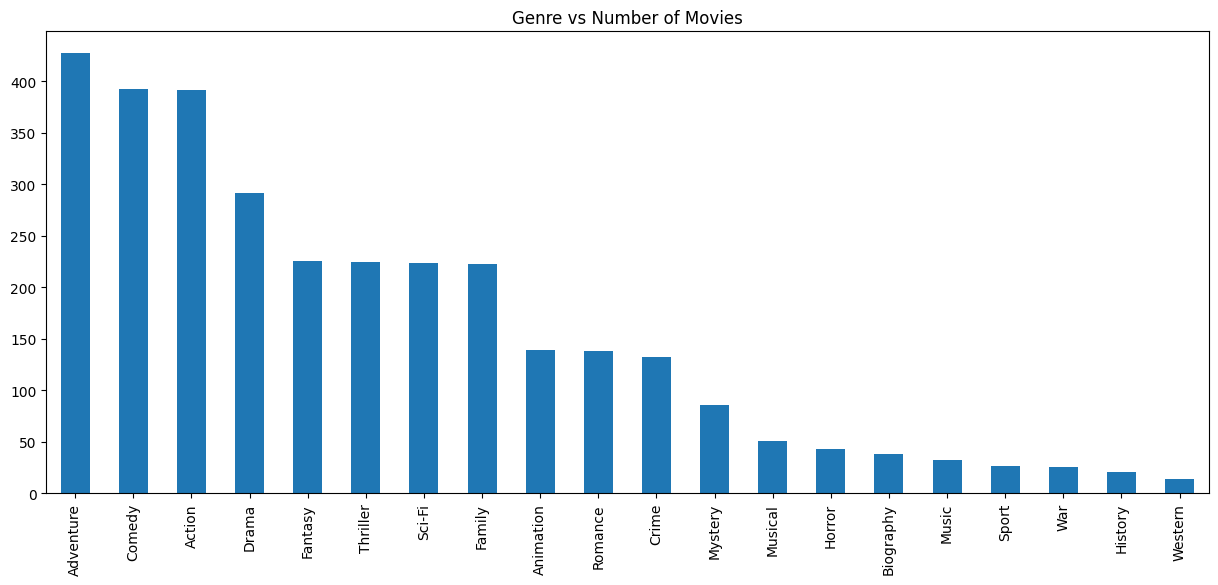

In [1077]:
enc = OneHotEncoder()
encode_data = pd.DataFrame(enc.fit_transform(df_new_genre[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]).toarray())
encode_data = pd.concat([df_new_genre, encode_data], axis=1)

df_new_genre[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 6), title='Genre vs Number of Movies')


a bar graph using the one hot encoding algorithm checking to popular movie genres in each movie

C:\Users\jmitc\AppData\Local\Temp\ipykernel_31224\927390815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new_genre['License'].fillna('Unknown', inplace=True)


<Axes: title={'center': 'License of Title vs Number of Movies'}, xlabel='License'>

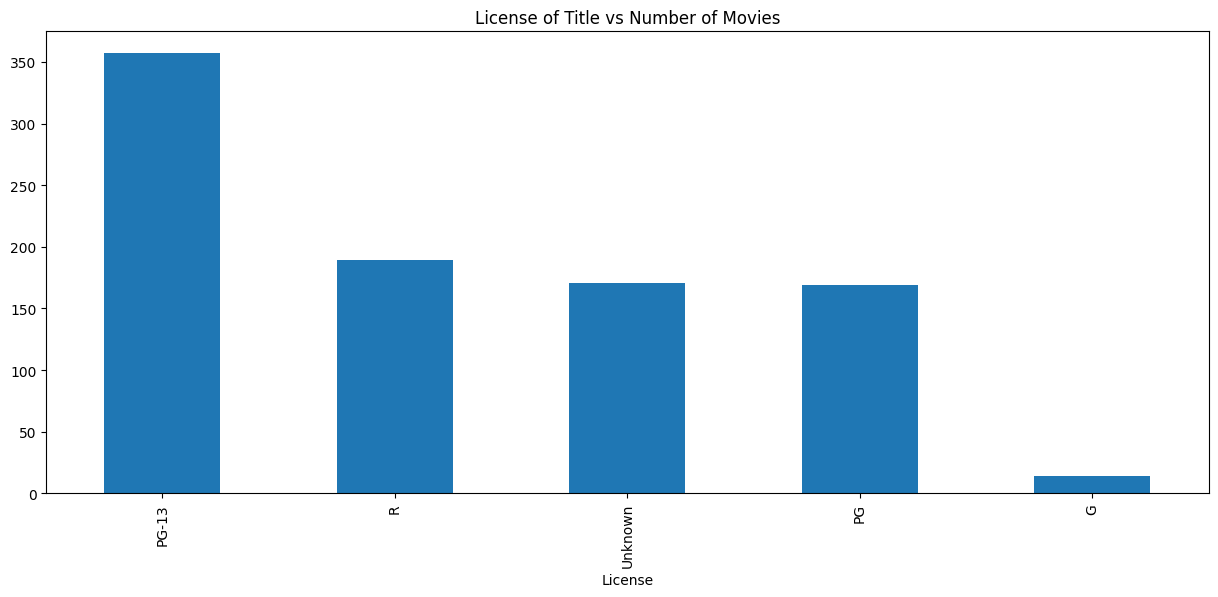

In [1078]:
#impute the missing values in License of title
df_new_genre['License'].fillna('Unknown', inplace=True)
df_new_genre['License'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(15, 6), title='License of Title vs Number of Movies')


Imputing the missing data in the License column